# Geopandas Advanced
    *  How to concatenate multiple geopandas frames?
    *  How to chnage the geometry crs
    *  how to display on a basemap
    *  how to display on folium map


## http://geopandas.org/index.html
## https://geohackweek.github.io/vector/04-geopandas-intro/
## https://pythongisresources.wordpress.com/packages/


GeoPandas is an open source project to make working with geospatial data in python easier. GeoPandas extends the datatypes used by pandas to allow spatial operations on geometric types. Geometric operations are performed by shapely. Geopandas further depends on fiona for file access and descartes and matplotlib for plotting.

In [1]:
import os,sys
import glob
import csv
import numpy as np
import pandas as pd
import geopandas as gpd

%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib as mpl


mpl.rcParams['lines.linewidth'] = 2
# mpl.rcParams['lines.color'] = 'r'

mpl.rcParams['figure.figsize']=[30,10]

# Create Geo-database of MT Surveys datasets


1) walk through all edi files

2) get lat lon, station name, etc.

3) create csv, export to shapefile


In [2]:
import mtpy.imaging.penetration_depth_3d_profile as pen3d

INFO:root:module file: /Softlab/Githubz/mtpy2/mtpy/utils/mtpylog.pyc
INFO:root:Effective yaml configuration file /Softlab/Githubz/mtpy2/mtpy/utils/logging.yml


2017-03-12 14:14:18,418 - root - INFO - module file: /Softlab/Githubz/mtpy2/mtpy/utils/mtpylog.pyc
2017-03-12 14:14:18,445 - root - INFO - Effective yaml configuration file /Softlab/Githubz/mtpy2/mtpy/utils/logging.yml


In [3]:

def process_edifiles(edi_files):
    """loop over all edi files to extract relevant properties from each edifile:
        lat, lon, elev, station_name, acquisition_date, ....... 
    """
    
    PER_LIST0=None   # the first period list as a reference for checking other stations period
    latlon_dep=[]  # CSV to be returned
    for afile in edi_files:
        # for efile in edi_files[:2]:
#         logger.debug("processing %s", afile)
        lat,lon, per, depths=pen3d.get_penetration_depths_from_edi_file(afile)
        if PER_LIST0 is None:
            PER_LIST0=per # initial value assignment
            depth_string = ','.join(['%.2f' % num for num in depths])
            latlon_dep.append((lat, lon, depth_string))

        elif len(per)== len(PER_LIST0) and (per == PER_LIST0).all():  # same length and same values.
            depth_string = ','.join(['%.2f' % num for num in depths])
            latlon_dep.append((lat,lon, depth_string))
        else:
            #logger.warn("MT Periods Not Equal !! %s VS %s", per, PER_LIST0 )
            pass

    return latlon_dep



In [5]:

EDI_DIR='/Softlab/Data/MT_datasets/728889/EDI_files'
#EDI_DIR='E:/Datasets/MT_Datasets/75098/EDI_files' #'E:/Datasets/MT_Datasets/728889/EDI_files'

edi_files = glob.glob(os.path.join(EDI_DIR, "*.edi"))

if (len(edi_files)<1):
    raise Exception("No edi files found!!!")
    
lat_lon_depth=process_edifiles(edi_files)

2017-03-12 14:14:34,202 - mtpy.core.edi - INFO - Reading the edi file /Softlab/Data/MT_datasets/728889/EDI_files/GB11.edi
2017-03-12 14:14:34,230 - mtpy.core.edi - INFO - Ordered arrays to be arranged from high to low frequency
2017-03-12 14:14:34,248 - mtpy.core.edi - INFO - Could not find any Tipper data.
2017-03-12 14:14:34,262 - mtpy.core.edi - INFO - Read in edi file for station GB11
2017-03-12 14:14:34,338 - mtpy.core.edi - INFO - Reading the edi file /Softlab/Data/MT_datasets/728889/EDI_files/GB08.edi
2017-03-12 14:14:34,357 - mtpy.core.edi - INFO - Ordered arrays to be arranged from high to low frequency
2017-03-12 14:14:34,388 - mtpy.core.edi - INFO - Could not find any Tipper data.
2017-03-12 14:14:34,403 - mtpy.core.edi - INFO - Read in edi file for station GB08
2017-03-12 14:14:34,442 - mtpy.core.edi - INFO - Reading the edi file /Softlab/Data/MT_datasets/728889/EDI_files/GB33.edi
2017-03-12 14:14:34,465 - mtpy.core.edi - INFO - Ordered arrays to be arranged from high to lo

/Softlab/Githubz/mtpy2/mtpy/analysis/zinvariants.py:227: RuntimeWarning: invalid value encountered in arcsin
  strikeangerr = abs(.5 * np.arcsin(inv7)) * (180 / np.pi)


2017-03-12 14:14:34,552 - mtpy.core.edi - INFO - Reading the edi file /Softlab/Data/MT_datasets/728889/EDI_files/GL02.edi
2017-03-12 14:14:34,573 - mtpy.core.edi - INFO - Ordered arrays to be arranged from high to low frequency
2017-03-12 14:14:34,609 - mtpy.core.edi - INFO - Read in edi file for station GL02
2017-03-12 14:14:34,639 - mtpy.core.edi - INFO - Reading the edi file /Softlab/Data/MT_datasets/728889/EDI_files/GL15.edi
2017-03-12 14:14:34,648 - mtpy.core.edi - INFO - Ordered arrays to be arranged from high to low frequency
2017-03-12 14:14:34,684 - mtpy.core.edi - INFO - Read in edi file for station GL15
2017-03-12 14:14:34,712 - mtpy.core.edi - INFO - Reading the edi file /Softlab/Data/MT_datasets/728889/EDI_files/GB27.edi
2017-03-12 14:14:34,760 - mtpy.core.edi - INFO - Ordered arrays to be arranged from high to low frequency
2017-03-12 14:14:34,791 - mtpy.core.edi - INFO - Could not find any Tipper data.
2017-03-12 14:14:34,801 - mtpy.core.edi - INFO - Read in edi file for

/Softlab/Githubz/mtpy2/mtpy/analysis/pt.py:1206: RuntimeWarning: invalid value encountered in absolute
  np.sum([np.abs(-pt_array[0, 0] * realz[1, 1] * z_err_array[0, 0]) ** 2,
/Softlab/Githubz/mtpy2/mtpy/analysis/pt.py:1209: RuntimeWarning: invalid value encountered in absolute
  z_err_array[0, 1]) ** 2,
/Softlab/Githubz/mtpy2/mtpy/analysis/pt.py:1212: RuntimeWarning: invalid value encountered in absolute
  np.abs(realz[1, 1] * z_err_array[0, 0]) ** 2,
/Softlab/Githubz/mtpy2/mtpy/analysis/pt.py:1216: RuntimeWarning: invalid value encountered in absolute
  np.sum([np.abs(-pt_array[0, 1] * realz[1, 1] * z_err_array[0, 0]) ** 2,
/Softlab/Githubz/mtpy2/mtpy/analysis/pt.py:1219: RuntimeWarning: invalid value encountered in absolute
  z_err_array[0, 1]) ** 2,
/Softlab/Githubz/mtpy2/mtpy/analysis/pt.py:1222: RuntimeWarning: invalid value encountered in absolute
  np.abs(realz[1, 1] * z_err_array[0, 1]) ** 2,
/Softlab/Githubz/mtpy2/mtpy/analysis/pt.py:1226: RuntimeWarning: invalid value encou

2017-03-12 14:14:35,848 - mtpy.core.edi - INFO - Ordered arrays to be arranged from high to low frequency
2017-03-12 14:14:35,871 - mtpy.core.edi - INFO - Could not find any Tipper data.
2017-03-12 14:14:35,882 - mtpy.core.edi - INFO - Read in edi file for station GB38
2017-03-12 14:14:35,908 - mtpy.core.edi - INFO - Reading the edi file /Softlab/Data/MT_datasets/728889/EDI_files/GL14.edi
2017-03-12 14:14:35,914 - mtpy.core.edi - INFO - Ordered arrays to be arranged from high to low frequency
2017-03-12 14:14:35,941 - mtpy.core.edi - INFO - Read in edi file for station GL14
2017-03-12 14:14:35,967 - mtpy.core.edi - INFO - Reading the edi file /Softlab/Data/MT_datasets/728889/EDI_files/GB31.edi
2017-03-12 14:14:35,973 - mtpy.core.edi - INFO - Ordered arrays to be arranged from high to low frequency
2017-03-12 14:14:35,997 - mtpy.core.edi - INFO - Could not find any Tipper data.
2017-03-12 14:14:36,007 - mtpy.core.edi - INFO - Read in edi file for station GB31
2017-03-12 14:14:36,035 - m

In [6]:

mypdf=pd.DataFrame(lat_lon_depth)

In [7]:
mypdf.head()

,0,1,2
0,-22.238889,135.274444,"12.92,36.88,43.37,63.78,76.71,104.25,120.81,16..."
1,-23.863889,135.472222,"3.81,18.25,31.51,82.78,114.37,160.13,185.02,23..."
2,-23.396667,135.473056,"194.71,576.45,682.21,923.06,1098.65,1519.90,17..."
3,-21.480833,135.325833,"29.27,96.95,121.23,187.00,236.11,368.13,458.03..."
4,-23.805000,135.527500,"112.68,255.71,296.39,379.95,443.17,557.82,620...."


In [8]:
history(mypdf.rename())

In [9]:
mypdf.rename(columns={0: 'lat', 1: 'lon', 2: 'pendepths'}, inplace=True)

In [10]:
mypdf.head()

,lat,lon,pendepths
0,-22.238889,135.274444,"12.92,36.88,43.37,63.78,76.71,104.25,120.81,16..."
1,-23.863889,135.472222,"3.81,18.25,31.51,82.78,114.37,160.13,185.02,23..."
2,-23.396667,135.473056,"194.71,576.45,682.21,923.06,1098.65,1519.90,17..."
3,-21.480833,135.325833,"29.27,96.95,121.23,187.00,236.11,368.13,458.03..."
4,-23.805000,135.527500,"112.68,255.71,296.39,379.95,443.17,557.82,620...."


In [11]:
mypdf.shape

(23, 3)

In [12]:
from shapely.geometry import Point

# combine lat and lon column to a shapely Point() object
mypdf['geometry'] = mypdf.apply(lambda x: Point((float(x[1]), float(x[0]))), axis=1)

In [13]:
mygdf = gpd.GeoDataFrame(mypdf, geometry='geometry')

In [14]:
mygdf.head()

,lat,lon,pendepths,geometry
0,-22.238889,135.274444,"12.92,36.88,43.37,63.78,76.71,104.25,120.81,16...",POINT (135.2744444444445 -22.23888888888889)
1,-23.863889,135.472222,"3.81,18.25,31.51,82.78,114.37,160.13,185.02,23...",POINT (135.4722222222222 -23.86388888888889)
2,-23.396667,135.473056,"194.71,576.45,682.21,923.06,1098.65,1519.90,17...",POINT (135.4730555555556 -23.39666666666666)
3,-21.480833,135.325833,"29.27,96.95,121.23,187.00,236.11,368.13,458.03...",POINT (135.3258333333333 -21.48083333333333)
4,-23.805000,135.527500,"112.68,255.71,296.39,379.95,443.17,557.82,620....",POINT (135.5275 -23.805)


In [15]:

mygdf.crs= "+proj=longlat +ellps=WGS84 +datum=WGS84 +no_defs"

mt_survey_loc_shp = os.path.join(EDI_DIR,'mt_survey_sites.shp') 
mygdf.to_file(mt_survey_loc_shp, driver='ESRI Shapefile')

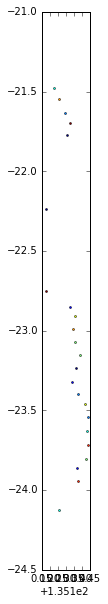

In [16]:
mygdf.plot()

In [17]:
mygdf2=mygdf.to_crs({'init':'epsg:4283'}) 
# WGS84: 'epsg:4326'

# GDA94:  EPSG:4283 See  http://epsg.io/4283

#http://spatialreference.org/ref/epsg/4283/


In [18]:
mygdf2.crs

{'init': 'epsg:4283'}

In [19]:
mygdf2utm=mygdf2.to_crs({'init':'epsg:32750'}) 

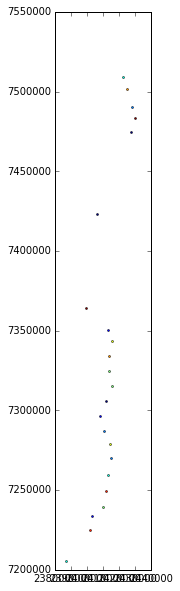

In [20]:
mygdf2utm.plot()

In [21]:
mygdf2utm.crs

{'init': 'epsg:32750'}

In [22]:
new_gdf = mygdf2utm.to_crs({'init':'epsg:4283'}) 

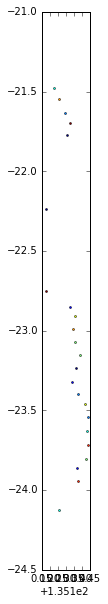

In [23]:
new_gdf.plot()

In [24]:
new_gdf.head()

,lat,lon,pendepths,geometry
0,-22.238889,135.274444,"12.92,36.88,43.37,63.78,76.71,104.25,120.81,16...",POINT (135.2744444444444 -22.23888888888888)
1,-23.863889,135.472222,"3.81,18.25,31.51,82.78,114.37,160.13,185.02,23...",POINT (135.4722222222222 -23.86388888888889)
2,-23.396667,135.473056,"194.71,576.45,682.21,923.06,1098.65,1519.90,17...",POINT (135.4730555555556 -23.39666666666667)
3,-21.480833,135.325833,"29.27,96.95,121.23,187.00,236.11,368.13,458.03...",POINT (135.3258333333333 -21.48083333333333)
4,-23.805000,135.527500,"112.68,255.71,296.39,379.95,443.17,557.82,620....",POINT (135.5275 -23.805)


In [25]:

shpfile=r'/Softlab/Data/MT_datasets/728889/Phase_Tensor_Shapes/Tip_2s_WGS84_imag.shp'
shpfile=r'E:/Datasets/MT_Datasets/75098/Phase_Tensor_Shapes/PT_2s_WGS84.shp'

shpf=gpd.GeoDataFrame.from_file(shpfile)

#shpf['phi_max'].plot(marker='*', markersize=14)

shpf.plot(cmap='OrRd', scheme='quantiles');  #(marker='o', color='red', markersize=5)
print shpf.shape

IOError: no such file or directory: 'E:/Datasets/MT_Datasets/75098/Phase_Tensor_Shapes/PT_2s_WGS84.shp'

In [ ]:
shpf.shape

In [ ]:
shpf.crs

In [ ]:
shpf.to_crs({'init':'epsg:4283'}).plot()

In [ ]:
shpf.to_crs({'init':'epsg:32752'}).plot()


# Reading Shape files

# Analyze and visualize the geodata

In [ ]:
# #shpfile=r'E:\MT_shape_files\PT_0.8547s_WGS84.shp'
# shpfile=r'/Softlab/Data/MT_datasets/75099_Youanmi/Phase_Tensor_Shapes/PT_109.23s_WGS84.shp'
# shpfile=r'/Softlab/Data/MT_datasets/75098/Location_shapefile/YOM_MT_CDP.shp'

shapefile_list=[
    "/Softlab/Data/MT_datasets/75099_Youanmi/Location_shapefiles/YMB2.shp",
    "/Softlab/Data/MT_datasets/75099_Youanmi/Location_shapefiles/YMB1.shp",
    "/Softlab/Data/MT_datasets/75099_Youanmi/Location_shapefiles/YML.shp",
    "/Softlab/Data/MT_datasets/75099_Youanmi/Location_shapefiles/YNB3.shp",
    r'/Softlab/Data/MT_datasets/75098/Location_shapefile/YOM_MT_CDP.shp'
    ]

shp_list=[]
for shpfile in shapefile_list:
    print ("Processing shape file: %s",shpfile)

    shp_gpd=gpd.GeoDataFrame.from_file(shpfile)
    shp_list.append(shp_gpd)

    print(shp_gpd.shape, shp_gpd.columns)
    print("Projection: ", shp_gpd.crs)


In [ ]:


# the first 3 shape files are of the same structure, they can be joined well:
rdf = gpd.GeoDataFrame( pd.concat( shp_list[:3], ignore_index=True) )

# if include the 4'th shapoe file, which has different columns, the concat will produce a many more columns gpd!!!!!

In [ ]:
rdf.shape

In [ ]:
rdf.columns

In [ ]:
rdf.head()

In [ ]:
rdf.plot()

In [ ]:

icount=4

shpf=shp_list[ icount ]

shpf.head()


In [ ]:
shpf.plot(marker='*', markersize=8)


# Re-Projecting

In [ ]:
shpf.geometry.crs

In [ ]:
# WGS84: 'epsg:4326'

# GDA94:  EPSG:4283 See  http://epsg.io/4283

#http://spatialreference.org/ref/epsg/4283/
    
myshpf= shpf.to_crs({'init':'epsg:4283'}) 


In [ ]:
myshpf.geometry.crs

In [ ]:
myshpf.plot(marker='^', markersize=10)


In [ ]:
# Now, we create centroids and make it the geometry:

myshpf['centroid_column'] =myshpf.centroid

myshpf = myshpf.set_geometry('centroid_column')

myshpf.plot(marker='o', markersize='12');

In [ ]:
myshpf.iloc[-2:]

In [ ]:
myshpf['geometry'][:10]

## Mapping onto World Basemap

In [ ]:
# geopandas included shape datasets
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

world.shape

In [ ]:


myax=world.plot(alpha=0.5)
#myax.set_xlim([149,150])
myax.set_xlim([110,155])
myax.set_ylim([-40,-10])
    
myax=myshpf.plot(ax=myax, figsize=(10, 6),  marker='o', color='blue', markersize=5);

In [ ]:
# what if the crs are different in layers.
world.crs

In [ ]:
myax=world.plot(alpha=0.5)
#myax.set_xlim([149,150])
myax.set_xlim([110,155])
myax.set_ylim([-40,-10])

rdf.plot(ax=myax, figsize=(10, 6),  marker='^', color='blue', markersize=5);


# Mapping with Folium

In [ ]:
# conda install folium

import folium

mapa = folium.Map([-30.0, 149.0], zoom_start=4,   tiles='cartodbpositron')


In [ ]:
myshpf = myshpf.set_geometry('geometry')
myshp2json=myshpf.geometry.to_json()

points =folium.features.GeoJson(myshp2json)
mapa.add_children(points)

In [ ]:
geoj2=shpf.to_crs(epsg=4326).to_json()

points2 =folium.features.GeoJson(geoj2)
mapa.add_children(points2)

In [ ]:
shpf3= shpf.to_crs({'init': 'epsg:4326'})
shpf3.plot()


In [ ]:
myax=world.plot(alpha=0.5)
#myax.set_xlim([149,150])
myax.set_xlim([110,155])
myax.set_ylim([-40,-10])
shpf3.plot(ax=myax, figsize=(10, 6),  marker='o', color='blue', markersize=5);

In [ ]:
#Phase Tensor shape files and Tipper (Real/Imag) Shape Files

#shpfile=r'E:\MT_shape_files\Tip_1.4286s_WGS84_imag.shp'
#shpfile=r'/Softlab/Data/MT_datasets/728889/Phase_Tensor_Shapes/Tip_2s_WGS84_imag.shp'
shpfile=mt_survey_loc_shp

shpf=gpd.GeoDataFrame.from_file(shpfile)

#shpf['phi_max'].plot(marker='*', markersize=14)

shpf.plot(cmap='OrRd', scheme='quantiles');  #(marker='o', color='red', markersize=5)
print mt_survey_loc_shp
print shpf.shape

In [ ]:

shpfile=r'/Softlab/Data/MT_datasets/728889/Phase_Tensor_Shapes/Tip_2s_WGS84_imag.shp'
#shpfile=r'E:/Datasets/MT_Datasets/75098/Phase_Tensor_Shapes/PT_2s_WGS84.shp'

shpf=gpd.GeoDataFrame.from_file(shpfile)

#shpf['phi_max'].plot(marker='*', markersize=14)

shpf.plot(cmap='OrRd', scheme='quantiles');  #(marker='o', color='red', markersize=5)
print shpf.shape

In [ ]:
shpf.crs